In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

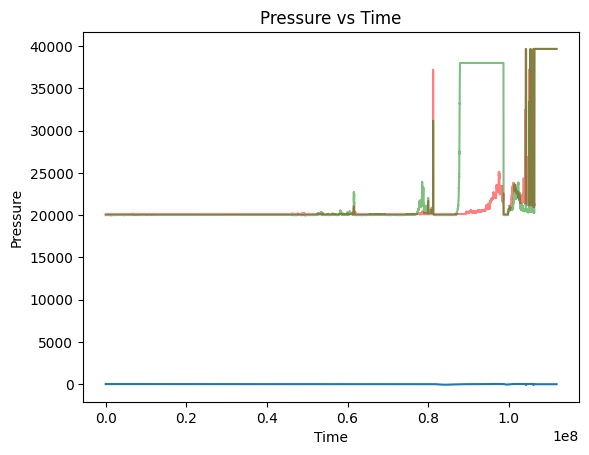

In [ ]:
df = pd.read_csv('../data/modified/allData.csv')

# Vertical Shift & Scalar for CO2 and TVOC
verticalShift = 20000
scalar = 0.3

# df = smoothData(df, 'Pressure', 1000)
# df = smoothData(df, 'CO2 equivelent', 100)
# df = smoothData(df, 'TVOC', 100)

# df = thresholdData(df, 'TVOC', 60000)
# df = thresholdData(df, 'CO2 equivelent', 60000)

plt.plot(df['Time'],df['Pressure'])
plt.plot(df['Time'],(df['CO2 equivelent'])*scalar+verticalShift, color='red', alpha=0.5)
plt.plot(df['Time'],(df['TVOC'])*scalar+verticalShift, color='green', alpha=0.5)
plt.title('Pressure vs Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.show()